In [93]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import mannwhitneyu
import re
import os
import seaborn as sns
from matplotlib import cm, colors

In [94]:
pd.set_option('display.max_columns', None) # Mostrar todas las columnas del DataFrame

In [95]:
NUMBER_VOICES = 20
PATH = os.getcwd()
TEST_FOLDER = 'test-result'
CASO_MATI = 'caso_mati.csv'
TEST_RESULT = 'Test_Subjetivo_Analisis_de_voces_artificiales_Submissions.csv'

## Caso arreglo mati

In [96]:
df_mati = pd.read_csv(os.path.join(PATH, TEST_FOLDER, CASO_MATI))

In [97]:
df_mati.columns = [x.strip() for x in df_mati.columns]

df_mati.rename(
    columns={
        "Cadencia": "Cadencia (16)",
        "Cadencia (16)": "Cadencia (17)",
        "Cadencia (17)": "Cadencia (18)",
        "Cadencia (18)": "Cadencia (19)",
        "Cadencia (19)": "Cadencia (20)",
        "¿Cuál es tu género?": "¿Cuál es tu género?\n",
        "¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?": "¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n"
    },
    inplace=True
)

In [98]:
df_mati

,Submission ID,Respondent ID,Submitted at,¿En cuál rango de edad te encuentras?,¿En qué lugar geográfico residís?,¿Cuál es tu género?\n,"¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n",Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
0,ZODWNy,AKvxEe,2023-05-31 22:37:39,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,5,5,4,5,5,5,5,5,5,5,4,2,2,2,4,3,3,3,4,5,4,2,2,3,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,4,5,4,3,2,3,5,5,3,2,3,4,5,4,2,3,5,4,4,1,1,5,4,5,5,5,4,3,4,5,5,5,5,5,3,5,5,3,3,4,2,5,4,4,3,3,5,5,5,4,5,5,5,5,4,5


## Comienzo de datos

In [99]:
df = pd.read_csv(os.path.join(PATH, TEST_FOLDER, TEST_RESULT))

In [100]:
df.head()

,Submission ID,Respondent ID,Submitted at,¿En cuál rango de edad te encuentras?,¿En qué lugar geográfico residís?,¿Cuál es tu género?\n,"¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n",Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
0,14RxaO,jbQeoJ,2023-06-01 16:51:37,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,2,5,2,4,4,3,5,3,2,5,3,2,2,2,5,2,5,2,5,5,2,5,1,2,5,5,3,4,5,5,5,4,3,5,5,4,5,1,2,5,5,4,2,2,5,5,5,1,1,5,5,5,4,4,5,5,4,3,2,5,5,2,1,1,5,5,4,4,5,5,4,1,3,4,5,4,2,3,5,5,5,5,2,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5
1,rOYWbR,Ol5QxR,2023-06-01 17:06:01,Entre 25 y 29 años,Ciudad Autónoma de Buenos Aires,Masculino,Sí,4,4,4,3,5,5,5,5,4,5,4,3,2,1,1,4,3,2,2,2,4,4,3,2,1,5,5,5,4,5,4,4,4,3,3,4,3,3,1,3,5,5,5,5,5,4,3,1,1,1,5,5,4,4,5,4,4,3,2,2,5,5,5,3,1,5,5,5,3,4,5,5,5,3,3,5,5,5,5,5,5,4,5,1,3,4,4,4,1,3,5,5,5,4,5,5,5,5,5,5
2,vDzZRv,vryyJl,2023-06-01 20:22:14,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,4,3,3,5,5,4,4,4,5,3,1,1,1,5,3,3,2,4,4,3,1,1,1,4,4,4,3,3,4,4,4,4,4,3,3,3,3,3,4,4,4,1,1,3,3,1,1,1,1,1,1,1,1,5,4,3,3,3,4,1,1,1,1,4,4,4,4,4,5,2,3,5,4,4,4,3,3,2,4,4,4,3,3,4,4,3,1,2,4,4,3,4,3,4,4,4,4,4
3,MaVopM,oDMBOb,2023-06-01 22:09:25,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,5,3,3,5,3,3,3,3,5,5,3,3,3,5,5,5,5,5,5,3,3,3,3,5,5,5,5,5,5,5,5,3,3,5,3,3,3,3,5,5,5,3,3,5,5,3,3,3,5,5,3,3,3,5,5,5,4,4,5,5,5,2,1,5,5,5,5,1,5,3,4,4,4,5,5,5,5,1,5,5,5,5,1,5,5,5,3,1,5,5,5,5,1,5,5,5,5,1
4,El6jGq,Zo6JLy,2023-06-01 23:11:57,Entre 55 y 59 años,Buenos Aires,Masculino,No,5,5,5,5,5,5,5,5,5,5,5,5,5,1,2,5,5,5,4,5,5,5,5,2,2,5,5,5,4,5,5,5,5,5,5,5,5,5,3,2,5,5,5,4,4,5,5,4,3,2,5,5,5,2,3,5,5,5,4,3,5,5,5,1,2,5,5,5,5,5,5,5,5,3,3,5,5,5,4,5,5,5,5,3,4,5,5,5,3,2,5,5,5,5,5,5,5,5,3,3


In [101]:
df = pd.concat([df_mati, df], ignore_index=True)

In [102]:
df.rename(
    columns={
        'Submitted at': 'Marca temporal',
        '¿En cuál rango de edad te encuentras?': 'Rango_edad',
        '¿En qué lugar geográfico residís?': 'Lugar_geografico',
        '¿Cuál es tu género?\n': 'Genero',
        '¿Tienes experiencia previa utilizando tecnología de voz, como asistentes virtuales o sistemas de reconocimiento de voz?\n': 'Experiencia'
    },
    inplace=True)

## Sample Analysis

In [103]:
df_sample = df.loc[:, ['Lugar_geografico', 'Genero', 'Rango_edad', 'Experiencia']]

In [104]:
df_sample.head()

,Lugar_geografico,Genero,Rango_edad,Experiencia
0,Buenos Aires,Masculino,Entre 25 y 29 años,No
1,Buenos Aires,Masculino,Entre 25 y 29 años,No
2,Ciudad Autónoma de Buenos Aires,Masculino,Entre 25 y 29 años,Sí
3,Buenos Aires,Femenino,Entre 25 y 29 años,Sí
4,Buenos Aires,Femenino,Entre 25 y 29 años,Sí


### Rango de edad

In [105]:
data_age = df_sample.Rango_edad.value_counts()
data_age = pd.DataFrame(data_age)
data_age = data_age.reset_index().rename(columns={'count': 'Cantidad'})
data_age['Total'] = len(df_sample)
data_age['Relative_freq'] = np.round((data_age.Cantidad / data_age.Total)*100, 1)
data_age.sort_values(by=['Rango_edad'],inplace= True)
data_age

,Rango_edad,Cantidad,Total,Relative_freq
1,Entre 18 y 24 años,5,38,13.2
0,Entre 25 y 29 años,24,38,63.2
5,Entre 30 y 34 años,1,38,2.6
2,Entre 35 y 39 años,3,38,7.9
6,Entre 40 y 44 años,1,38,2.6
7,Entre 44 y 49 años,1,38,2.6
4,Entre 50 y 54 años,1,38,2.6
3,Entre 55 y 59 años,2,38,5.3


In [106]:
rango_edad_faltantes = {
    'Rango_edad': [
        'Menor a 18 años',
        'Entre 40 y 44 años',
        'Entre 44 y 49 años',
        'Entre 60 y 64 años',
        '65 años o más'
    ],
    'Cantidad': np.zeros((5,)),
    'Total': [len(df_sample)] * 5,
    'Relative_freq': [0.0] * 5,
}

df_add = pd.DataFrame(rango_edad_faltantes)

In [107]:
data_age = pd.concat([data_age, df_add], ignore_index=True)
age_order = [
    'Menor a 18 años', 'Entre 18 y 24 años', 'Entre 25 y 29 años',
    'Entre 30 y 34 años', 'Entre 35 y 39 años', 'Entre 50 y 54 años', 
    'Entre 55 y 59 años', 'Entre 60 y 64 años', '65 años o más'
]
data_age['Rango_edad'] = pd.Categorical(data_age['Rango_edad'], categories=age_order, ordered=True)
data_age = data_age.sort_values('Rango_edad')
data_age

,Rango_edad,Cantidad,Total,Relative_freq
8,Menor a 18 años,0.0,38,0.0
0,Entre 18 y 24 años,5.0,38,13.2
1,Entre 25 y 29 años,24.0,38,63.2
2,Entre 30 y 34 años,1.0,38,2.6
3,Entre 35 y 39 años,3.0,38,7.9
6,Entre 50 y 54 años,1.0,38,2.6
7,Entre 55 y 59 años,2.0,38,5.3
11,Entre 60 y 64 años,0.0,38,0.0
12,65 años o más,0.0,38,0.0
4,NaN,1.0,38,2.6


In [108]:
data_age.Relative_freq.sum()

99.99999999999999

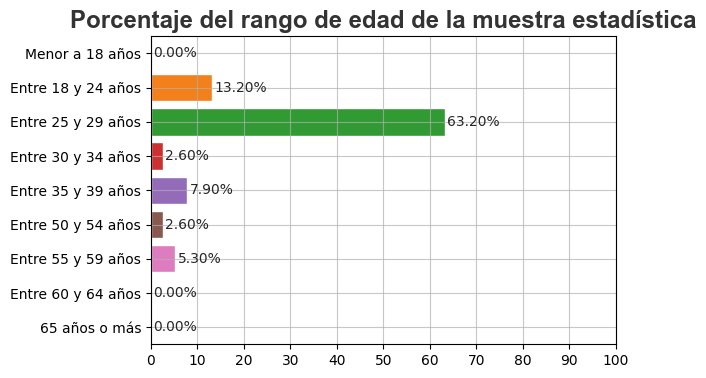

In [109]:
dims = (6,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x = 'Relative_freq', y = 'Rango_edad',data=data_age,ax=ax,saturation=0.9,)
    g.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Porcentaje del rango de edad de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_xticks(list(range(0,110,10)))
    g.grid(alpha=0.7)
    # g.xaxis.grid(True, alpha=0.8)

    # Agregar etiquetas con los valores de las barras horizontales
    for p in g.patches:
        width = p.get_width()
        g.text(width + 0.5,
               p.get_y() + p.get_height() / 2,
               '{:1.2f}%'.format(width),
               ha="left",
               va="center")


### Género

In [110]:
data_gender = df_sample.Genero.value_counts()
data_gender = pd.DataFrame(data_gender)
data_gender = data_gender.reset_index().rename(columns={'count': 'Cantidad'})
data_gender['Total'] = len(df_sample)
data_gender['Relative_freq'] = np.round((data_gender.Cantidad / data_gender.Total)*100, 1)
data_gender.sort_values(by=['Genero'],inplace= True)
data_gender

,Genero,Cantidad,Total,Relative_freq
1,Femenino,8,38,21.1
0,Masculino,30,38,78.9


In [111]:
genero_faltantes = {
    'Genero': [
        'No binarie',
        'Prefiero no responder',
    ],
    'Cantidad': np.zeros((2,)),
    'Total': [len(df_sample)] * 2,
    'Relative_freq': [0.0] * 2,
}

df_add = pd.DataFrame(genero_faltantes)

In [112]:
data_gender = pd.concat([data_gender, df_add], ignore_index=True)
data_gender

,Genero,Cantidad,Total,Relative_freq
0,Femenino,8.0,38,21.1
1,Masculino,30.0,38,78.9
2,No binarie,0.0,38,0.0
3,Prefiero no responder,0.0,38,0.0


In [113]:
data_gender.Relative_freq.sum()

100.0

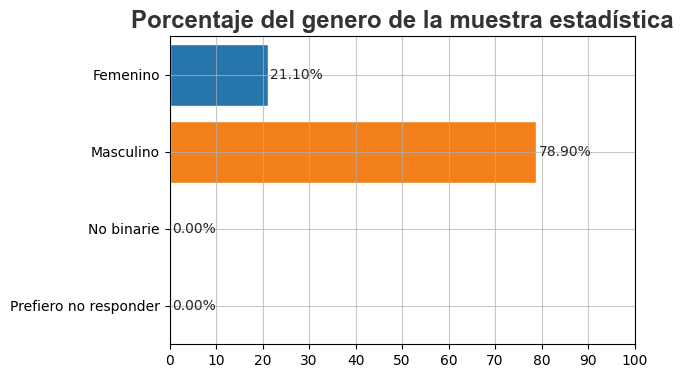

In [114]:
dims = (6,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x = 'Relative_freq', y = 'Genero',data=data_gender,ax=ax,saturation=0.9)
    g.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Porcentaje del genero de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_xticks(list(range(0,110,10)))
    g.grid(alpha=0.7)
    # g.xaxis.grid(True, alpha=0.8)

    # Agregar etiquetas con los valores de las barras horizontales
    for p in g.patches:
        width = p.get_width()
        g.text(width + 0.5,
               p.get_y() + p.get_height() / 2,
               '{:1.2f}%'.format(width),
               ha="left",
               va="center")

### Lugar Geográfico

In [115]:
data_zone = df_sample.Lugar_geografico.value_counts()
data_zone = pd.DataFrame(data_zone)
data_zone = data_zone.reset_index().rename(columns={'count': 'Cantidad'})
data_zone['Total'] = len(df_sample)
data_zone['Relative_freq'] = np.round((data_zone.Cantidad / data_zone.Total)*100, 1)
data_zone.sort_values(by=['Lugar_geografico'],inplace= True)
data_zone

,Lugar_geografico,Cantidad,Total,Relative_freq
0,Buenos Aires,22,38,57.9
1,Ciudad Autónoma de Buenos Aires,12,38,31.6
3,Córdoba,1,38,2.6
2,Mendoza,1,38,2.6
5,San Juan,1,38,2.6
4,Santa Fe,1,38,2.6


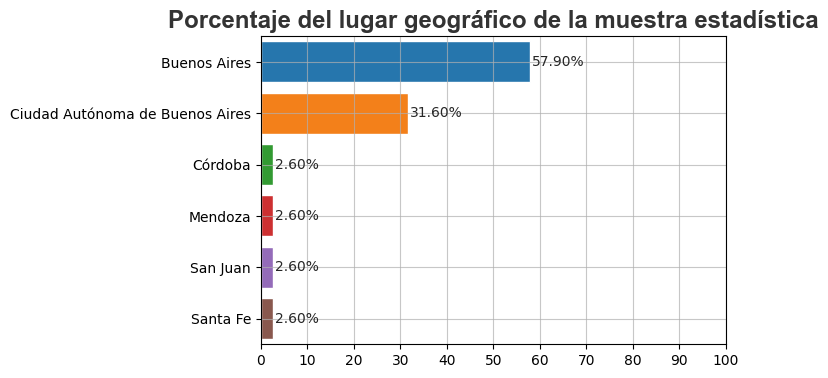

In [116]:
dims = (6,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x = 'Relative_freq', y = 'Lugar_geografico', data=data_zone,ax=ax,saturation=0.9)
    g.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Porcentaje del lugar geográfico de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_xticks(list(range(0,110,10)))
    g.grid(alpha=0.7)
    # g.xaxis.grid(True, alpha=0.8)

    # Agregar etiquetas con los valores de las barras horizontales
    for p in g.patches:
        width = p.get_width()
        g.text(width + 0.5,
               p.get_y() + p.get_height() / 2,
               '{:1.2f}%'.format(width),
               ha="left",
               va="center")

### Experiencia en Uso de Tecnologías TTS

In [117]:
data_exp = df_sample.Experiencia.value_counts()
data_exp = pd.DataFrame(data_exp)
data_exp = data_exp.reset_index().rename(columns={'count': 'Cantidad'})
data_exp['Total'] = len(df_sample)
data_exp['Relative_freq'] = np.round((data_exp.Cantidad / data_exp.Total)*100, 1)
data_exp.sort_values(by=['Experiencia'],inplace= True)
data_exp

,Experiencia,Cantidad,Total,Relative_freq
1,No,15,38,39.5
2,No estoy seguro,4,38,10.5
0,Sí,19,38,50.0


In [118]:
exp_faltantes = {
    'Experiencia': ['Prefiero no responder'],
    'Cantidad': [0.0],
    'Total': [len(df_sample)],
    'Relative_freq': [0.0],
}

df_add = pd.DataFrame(exp_faltantes)

In [119]:
data_exp = pd.concat([data_exp, df_add], ignore_index=True)
data_exp

,Experiencia,Cantidad,Total,Relative_freq
0,No,15.0,38,39.5
1,No estoy seguro,4.0,38,10.5
2,Sí,19.0,38,50.0
3,Prefiero no responder,0.0,38,0.0


In [120]:
data_exp.Relative_freq.sum()

100.0

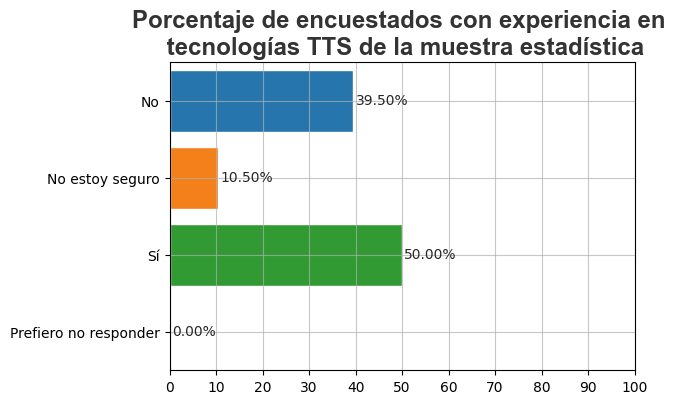

In [121]:
dims = (6,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.barplot(x = 'Relative_freq', y = 'Experiencia',data=data_exp,ax=ax,saturation=0.9)
    g.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_title('Porcentaje de encuestados con experiencia en \n tecnologías TTS de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    g.set_xticks(list(range(0,110,10)))
    g.grid(alpha=0.7)
    # g.xaxis.grid(True, alpha=0.8)

    # Agregar etiquetas con los valores de las barras horizontales
    for p in g.patches:
        width = p.get_width()
        g.text(width + 0.5,
               p.get_y() + p.get_height() / 2,
               '{:1.2f}%'.format(width),
               ha="left",
               va="center")

## Preprocessing

In [122]:
df.head()

,Submission ID,Respondent ID,Marca temporal,Rango_edad,Lugar_geografico,Genero,Experiencia,Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
0,ZODWNy,AKvxEe,2023-05-31 22:37:39,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,5,5,4,5,5,5,5,5,5,5,4,2,2,2,4,3,3,3,4,5,4,2,2,3,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,4,5,3,4,5,4,3,2,3,5,5,3,2,3,4,5,4,2,3,5,4,4,1,1,5,4,5,5,5,4,3,4,5,5,5,5,5,3,5,5,3,3,4,2,5,4,4,3,3,5,5,5,4,5,5,5,5,4,5
1,14RxaO,jbQeoJ,2023-06-01 16:51:37,Entre 25 y 29 años,Buenos Aires,Masculino,No,5,2,5,2,4,4,3,5,3,2,5,3,2,2,2,5,2,5,2,5,5,2,5,1,2,5,5,3,4,5,5,5,4,3,5,5,4,5,1,2,5,5,4,2,2,5,5,5,1,1,5,5,5,4,4,5,5,4,3,2,5,5,2,1,1,5,5,4,4,5,5,4,1,3,4,5,4,2,3,5,5,5,5,2,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5
2,rOYWbR,Ol5QxR,2023-06-01 17:06:01,Entre 25 y 29 años,Ciudad Autónoma de Buenos Aires,Masculino,Sí,4,4,4,3,5,5,5,5,4,5,4,3,2,1,1,4,3,2,2,2,4,4,3,2,1,5,5,5,4,5,4,4,4,3,3,4,3,3,1,3,5,5,5,5,5,4,3,1,1,1,5,5,4,4,5,4,4,3,2,2,5,5,5,3,1,5,5,5,3,4,5,5,5,3,3,5,5,5,5,5,5,4,5,1,3,4,4,4,1,3,5,5,5,4,5,5,5,5,5,5
3,vDzZRv,vryyJl,2023-06-01 20:22:14,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,4,3,3,5,5,4,4,4,5,3,1,1,1,5,3,3,2,4,4,3,1,1,1,4,4,4,3,3,4,4,4,4,4,3,3,3,3,3,4,4,4,1,1,3,3,1,1,1,1,1,1,1,1,5,4,3,3,3,4,1,1,1,1,4,4,4,4,4,5,2,3,5,4,4,4,3,3,2,4,4,4,3,3,4,4,3,1,2,4,4,3,4,3,4,4,4,4,4
4,MaVopM,oDMBOb,2023-06-01 22:09:25,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,5,3,3,5,3,3,3,3,5,5,3,3,3,5,5,5,5,5,5,3,3,3,3,5,5,5,5,5,5,5,5,3,3,5,3,3,3,3,5,5,5,3,3,5,5,3,3,3,5,5,3,3,3,5,5,5,4,4,5,5,5,2,1,5,5,5,5,1,5,3,4,4,4,5,5,5,5,1,5,5,5,5,1,5,5,5,3,1,5,5,5,5,1,5,5,5,5,1


In [123]:
# Crear una lista vacía para almacenar los DataFrames resultantes
dfs = []

# Iterar sobre las filas del DataFrame original
for i, row in df.iterrows():
    
    # Crear un nuevo DataFrame con una sola fila
    df_row = pd.DataFrame(row).T
    
    # Aplicar la función melt al DataFrame para transformarlo en el formato deseado
    df_melted = pd.melt(df_row,
                        id_vars=['Marca temporal'],
                        value_vars=[f'Comprensión del mensaje ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Acentuación ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Pronunciación ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Cadencia ({i})' for i in range(1, NUMBER_VOICES + 1)] +
                                   [f'Naturalidad ({i})' for i in range(1, NUMBER_VOICES + 1)],
                        var_name='Variable',
                        value_name='Valor')
    
    # Agregar una columna con el número de voz
    df_melted['Voz'] = (df_melted.index % NUMBER_VOICES) + 1
    
    # Reemplazar los valores de la columna 'Variable' por los nombres deseados
    df_melted['Variable'] = df_melted['Variable'].replace({f'Comprensión del mensaje ({i})': 'Inteligibilidad' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Acentuación ({i})': 'Acentuacion' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Pronunciación ({i})': 'Pronunciacion' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Cadencia ({i})': 'Cadencia' for i in range(1, NUMBER_VOICES + 1)})
    df_melted['Variable'] = df_melted['Variable'].replace({f'Naturalidad ({i})': 'Naturalidad' for i in range(1, NUMBER_VOICES + 1)})
    
    # Pivotear el DataFrame para obtener el formato final
    df_pivoted = df_melted.pivot(index='Voz', columns='Variable', values='Valor').reset_index()
    
    # Agregar la columna 'Marca temporal'
    df_pivoted['Marca temporal'] = row['Marca temporal']
    
    # Reordenar las columnas
    df_pivoted = df_pivoted[['Marca temporal', 'Inteligibilidad', 'Pronunciacion',  'Acentuacion', 'Naturalidad', 'Cadencia']]
    
    # Agregar el DataFrame a la lista
    dfs.append(df_pivoted)
    
# Concatenar los DataFrames de la lista para obtener el DataFrame final
df_final = pd.concat(dfs).reset_index(drop=True)


In [124]:
df[df['Marca temporal'] == '2023-06-01 20:22:14']

,Submission ID,Respondent ID,Marca temporal,Rango_edad,Lugar_geografico,Genero,Experiencia,Comprensión del mensaje (1),Pronunciación (1),Acentuación (1),Naturalidad (1),Cadencia (1),Comprensión del mensaje (2),Pronunciación (2),Acentuación (2),Naturalidad (2),Cadencia (2),Comprensión del mensaje (3),Pronunciación (3),Acentuación (3),Naturalidad (3),Cadencia (3),Comprensión del mensaje (4),Pronunciación (4),Acentuación (4),Naturalidad (4),Cadencia (4),Comprensión del mensaje (5),Pronunciación (5),Acentuación (5),Naturalidad (5),Cadencia (5),Comprensión del mensaje (6),Pronunciación (6),Acentuación (6),Naturalidad (6),Cadencia (6),Comprensión del mensaje (7),Pronunciación (7),Acentuación (7),Naturalidad (7),Cadencia (7),Comprensión del mensaje (8),Pronunciación (8),Acentuación (8),Naturalidad (8),Cadencia (8),Comprensión del mensaje (9),Pronunciación (9),Acentuación (9),Naturalidad (9),Cadencia (9),Comprensión del mensaje (10),Pronunciación (10),Acentuación (10),Naturalidad (10),Cadencia (10),Comprensión del mensaje (11),Pronunciación (11),Acentuación (11),Naturalidad (11),Cadencia (11),Comprensión del mensaje (12),Pronunciación (12),Acentuación (12),Naturalidad (12),Cadencia (12),Comprensión del mensaje (13),Pronunciación (13),Acentuación (13),Naturalidad (13),Cadencia (13),Comprensión del mensaje (14),Pronunciación (14),Acentuación (14),Naturalidad (14),Cadencia (14),Comprensión del mensaje (15),Pronunciación (15),Acentuación (15),Naturalidad (15),Cadencia (15),Comprensión del mensaje (16),Pronunciación (16),Acentuación (16),Naturalidad (16),Cadencia (16),Comprensión del mensaje (17),Pronunciación (17),Acentuación (17),Naturalidad (17),Cadencia (17),Comprensión del mensaje (18),Pronunciación (18),Acentuación (18),Naturalidad (18),Cadencia (18),Comprensión del mensaje (19),Pronunciación (19),Acentuación (19),Naturalidad (19),Cadencia (19),Comprensión del mensaje (20),Pronunciación (20),Acentuación (20),Naturalidad (20),Cadencia (20)
3,vDzZRv,vryyJl,2023-06-01 20:22:14,Entre 25 y 29 años,Buenos Aires,Femenino,Sí,5,5,4,3,3,5,5,4,4,4,5,3,1,1,1,5,3,3,2,4,4,3,1,1,1,4,4,4,3,3,4,4,4,4,4,3,3,3,3,3,4,4,4,1,1,3,3,1,1,1,1,1,1,1,1,5,4,3,3,3,4,1,1,1,1,4,4,4,4,4,5,2,3,5,4,4,4,3,3,2,4,4,4,3,3,4,4,3,1,2,4,4,3,4,3,4,4,4,4,4


In [125]:
df_final[df_final['Marca temporal'] == '2023-06-01 20:22:14']

# df_final['Marca temporal'].unique()

Variable,Marca temporal,Inteligibilidad,Pronunciacion,Acentuacion,Naturalidad,Cadencia
60,2023-06-01 20:22:14,5,5,4,3,3
61,2023-06-01 20:22:14,5,5,4,4,4
62,2023-06-01 20:22:14,5,3,1,1,1
63,2023-06-01 20:22:14,5,3,3,2,4
64,2023-06-01 20:22:14,4,3,1,1,1
65,2023-06-01 20:22:14,4,4,4,3,3
66,2023-06-01 20:22:14,4,4,4,4,4
67,2023-06-01 20:22:14,3,3,3,3,3
68,2023-06-01 20:22:14,4,4,4,1,1
69,2023-06-01 20:22:14,3,3,1,1,1


In [126]:
df_final = df_final.drop('Marca temporal', axis=1)
df_final = df_final.astype(int)

In [127]:
# Generar la columna "ID" con el patrón deseado
num_repetitions = 20
num_rows = len(df_final)
id_values = np.tile(np.arange(1, num_repetitions + 1), (num_rows // num_repetitions) + 1)[:num_rows]
df_final['ID'] = id_values

In [128]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Inteligibilidad  760 non-null    int32
 1   Pronunciacion    760 non-null    int32
 2   Acentuacion      760 non-null    int32
 3   Naturalidad      760 non-null    int32
 4   Cadencia         760 non-null    int32
 5   ID               760 non-null    int32
dtypes: int32(6)
memory usage: 17.9 KB


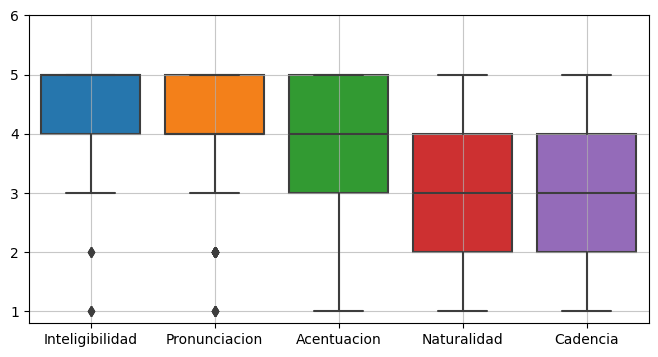

In [129]:
# Transformar el DataFrame para tener una columna con las categorías y otra con los valores
df_melted = df_final.melt(id_vars='ID', value_vars=['Inteligibilidad', 'Pronunciacion', 'Acentuacion', 'Naturalidad', 'Cadencia'], var_name='Variable', value_name='Valor')

dims = (8,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    # Crear un gráfico de caja para las columnas especificadas
    sns.boxplot(x='Variable', y='Valor', data=df_melted,ax=ax,saturation=0.9)
    
    # Personalizar el formato del gráfico
    ax.set_xlabel('',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.set_ylabel('',weight='bold',size='x-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.set_yticks(list(range(1,7)))
    # ax.set_title('Porcentaje del genero de la muestra estadística',weight='bold',size='xx-large',alpha=0.8,family= 'Arial',stretch='extra-expanded')
    ax.grid(alpha=0.7)

# Mostrar el gráfico
plt.show()

## Mann-Whitney Test

In [130]:
order = pd.read_excel('order_filename.ods')

In [131]:
obj_params = pd.read_excel('voces_test_rms.ods')

In [132]:
df_values =  pd.merge(
    df_final,
    order,
    how='left',
    on='ID'
)

In [133]:
df_mannwhitney =  pd.merge(
    df_values,
    obj_params[['file', 'genero']],
    how='left',
    left_on='filename',
    right_on='file'
).drop(columns=['filename'])

In [134]:
df_mannwhitney

,Inteligibilidad,Pronunciacion,Acentuacion,Naturalidad,Cadencia,ID,file,genero
0,5,5,5,4,5,1,alonso-naturalreader.wav,masculino
1,5,5,5,5,5,2,hyacinthe-lovo-v3.wav,femenino
2,5,4,2,2,2,3,neural2C-pitchmodified-speedmodified.wav,masculino
3,4,3,3,3,4,4,francisca-lovo-v2.wav,femenino
4,5,4,2,2,3,5,antoni-evenlabs-linguistico-v2.wav,masculino
...,...,...,...,...,...,...,...,...
755,5,5,5,3,5,16,neural2A-GCP.wav,femenino
756,5,5,5,2,4,17,antoni-evenlabs-v3.wav,masculino
757,5,5,5,4,3,18,elvira-lovo-pitchmodified.wav,femenino
758,5,5,5,4,5,19,neural2B-GCP.wav,masculino


### Inteligibilidad

In [135]:
mask_masculina = df_mannwhitney.genero == 'masculino'
inteligibilidad_masculina = df_mannwhitney.loc[mask_masculina, ['Inteligibilidad']].values.flatten()

In [136]:
mask_femenina = df_mannwhitney.genero == 'femenino'
inteligibilidad_femenina = df_mannwhitney.loc[mask_femenina, ['Inteligibilidad']].values.flatten()

In [137]:
# Realizar el test de Mann-Whitney U
inteligibilidad_estadistico, inteligibilidad_valor_p = mannwhitneyu(inteligibilidad_masculina, inteligibilidad_femenina)

In [138]:
if inteligibilidad_valor_p <= 0.05:
    print('El genero es factor de influencia para la inteligibilidad', 'p_value:', inteligibilidad_valor_p)
else:
    print('El genero no es factor de influencia para la inteligibilidad', 'p_value:', inteligibilidad_valor_p)

El genero no es factor de influencia para la inteligibilidad p_value: 0.1720808500119796


### Pronunciación

In [139]:
mask_masculina = df_mannwhitney.genero == 'masculino'
pronunciacion_masculina = df_mannwhitney.loc[mask_masculina, ['Pronunciacion']].values.flatten()

In [140]:
mask_femenina = df_mannwhitney.genero == 'femenino'
pronunciacion_femenina = df_mannwhitney.loc[mask_femenina, ['Pronunciacion']].values.flatten()

In [141]:
# Realizar el test de Mann-Whitney U
pronunciacion_estadistico, pronunciacion_valor_p = mannwhitneyu(pronunciacion_masculina, pronunciacion_femenina)

In [142]:
if pronunciacion_valor_p <= 0.05:
    print('El genero es factor de influencia para la pronunciación', 'p_value:', pronunciacion_valor_p)
else:
    print('El genero no es factor de influencia para la pronunciación', 'p_value:', pronunciacion_valor_p)

El genero no es factor de influencia para la pronunciación p_value: 0.060194344372692575


### Acentuación

In [143]:
mask_masculina = df_mannwhitney.genero == 'masculino'
acentuacion_masculina = df_mannwhitney.loc[mask_masculina, ['Acentuacion']].values.flatten()

In [144]:
mask_femenina = df_mannwhitney.genero == 'femenino'
acentuacion_femenina = df_mannwhitney.loc[mask_femenina, ['Acentuacion']].values.flatten()

In [145]:
# Realizar el test de Mann-Whitney U
acentuacion_estadistico, acentuacion_valor_p = mannwhitneyu(acentuacion_masculina, acentuacion_femenina)

In [146]:
if acentuacion_valor_p <= 0.05:
    print('El genero es factor de influencia para la acentuación', 'p_value:', acentuacion_valor_p)
else:
    print('El genero no es factor de influencia para la acentuación', 'p_value:', acentuacion_valor_p)

El genero es factor de influencia para la acentuación p_value: 0.002256054965892187


### Naturalidad

In [147]:
mask_masculina = df_mannwhitney.genero == 'masculino'
naturalidad_masculina = df_mannwhitney.loc[mask_masculina, ['Naturalidad']].values.flatten()

In [148]:
mask_femenina = df_mannwhitney.genero == 'femenino'
naturalidad_femenina = df_mannwhitney.loc[mask_femenina, ['Naturalidad']].values.flatten()

In [149]:
# Realizar el test de Mann-Whitney U
naturalidad_estadistico, naturalidad_valor_p = mannwhitneyu(naturalidad_masculina, naturalidad_femenina)

In [150]:
if naturalidad_valor_p <= 0.05:
    print('El genero es factor de influencia para la naturalidad', 'p_value:', naturalidad_valor_p)
else:
    print('El genero no es factor de influencia para la naturalidad', 'p_value:', naturalidad_valor_p)

El genero es factor de influencia para la naturalidad p_value: 0.0003898826946179198


### Cadencia

In [151]:
mask_masculina = df_mannwhitney.genero == 'masculino'
cadencia_masculina = df_mannwhitney.loc[mask_masculina, ['Cadencia']].values.flatten()

In [152]:
mask_femenina = df_mannwhitney.genero == 'femenino'
cadencia_femenina = df_mannwhitney.loc[mask_femenina, ['Cadencia']].values.flatten()

In [153]:
# Realizar el test de Mann-Whitney U
cadencia_estadistico, cadencia_valor_p = mannwhitneyu(cadencia_masculina, cadencia_femenina)

In [154]:
if cadencia_valor_p <= 0.05:
    print('El genero es factor de influencia para la cadencia', 'p_value:', cadencia_valor_p)
else:
    print('El genero no es factor de influencia para la cadencia', 'p_value:', cadencia_valor_p)

El genero es factor de influencia para la cadencia p_value: 3.426696135824565e-05


### Output Mann-Whitney Test

In [155]:
dicc_manwhitney = {
    'Parametro_subjetivo': [
        'inteligibilidad',
        'pronunciación',
        'acentuación',
        'naturalidad',
        'cadencia'
    ],
    'p_valor':[
        inteligibilidad_valor_p,
        pronunciacion_valor_p,
        acentuacion_valor_p,
        naturalidad_valor_p,
        cadencia_valor_p
    ]
}

df_output_mannwhitney = pd.DataFrame(dicc_manwhitney)

In [156]:
df_output_mannwhitney['Manwhitney'] = df_output_mannwhitney.apply(
    lambda x: 'Hay evidencia para afirmar que el genero es factor de influencia' if x.p_valor <= 0.05
        else 'No hay evidencia para afirmar que el genero es factor de influencia',
    axis=1
)

In [157]:
df_output_mannwhitney

,Parametro_subjetivo,p_valor,Manwhitney
0,inteligibilidad,0.172081,No hay evidencia para afirmar que el genero es...
1,pronunciación,0.060194,No hay evidencia para afirmar que el genero es...
2,acentuación,0.002256,Hay evidencia para afirmar que el genero es fa...
3,naturalidad,0.000390,Hay evidencia para afirmar que el genero es fa...
4,cadencia,0.000034,Hay evidencia para afirmar que el genero es fa...


In [158]:
df_output_mannwhitney.to_excel('df_output_mannwhitney.xlsx', index=False)

## Preprocessing Regression 

In [159]:
# Deberia hacer una limpieza de outlier para cada variable y que las mismas estén separadas y después separadas
# Lo que voy a hacer, es reemplazar los valores 1 y 2 por nan en inteligibilidad y pronunciación

In [160]:
df_values.Inteligibilidad = df_values.Inteligibilidad.apply(
    lambda x: np.nan if x == 1 or x == 2 else x
)

df_values.Pronunciacion = df_values.Pronunciacion.apply(
    lambda x: np.nan if x == 1 or x == 2 else x
)

In [161]:
# Realizar el pivote y calcular la media
pivot_df = pd.pivot_table(
    df_values,
    index=['ID', 'filename'],
    values=['Inteligibilidad', 'Acentuacion', 'Pronunciacion', 'Naturalidad', 'Cadencia'],
    aggfunc='mean'
)


In [162]:
pivot_df

,,Acentuacion,Cadencia,Inteligibilidad,Naturalidad,Pronunciacion
ID,filename,,,,,
1,alonso-naturalreader.wav,4.500000,3.921053,4.894737,2.947368,4.648649
2,hyacinthe-lovo-v3.wav,4.526316,4.184211,4.973684,4.105263,4.621622
3,neural2C-pitchmodified-speedmodified.wav,2.894737,1.684211,4.444444,1.684211,3.875000
4,francisca-lovo-v2.wav,4.184211,3.710526,4.605263,3.000000,4.314286
5,antoni-evenlabs-linguistico-v2.wav,3.210526,1.631579,4.526316,1.868421,4.117647
6,lola-murf.wav,4.315789,3.842105,4.894737,3.368421,4.473684
7,antonio-murf.wav,4.210526,3.815789,4.789474,3.184211,4.447368
8,agata-lovo-pitchmodified.wav,3.684211,2.236842,4.421053,2.105263,4.083333
9,neural2C-GCP-linguistico-speed0.78-pitchmodified.wav,4.289474,3.289474,4.815789,2.921053,4.552632


In [163]:
# Restablecer los índices y ordenar por las demás columnas
pivot_df = pivot_df.reset_index().sort_values(by=['ID', 'filename'])

pivot_df

,ID,filename,Acentuacion,Cadencia,Inteligibilidad,Naturalidad,Pronunciacion
0,1,alonso-naturalreader.wav,4.500000,3.921053,4.894737,2.947368,4.648649
1,2,hyacinthe-lovo-v3.wav,4.526316,4.184211,4.973684,4.105263,4.621622
2,3,neural2C-pitchmodified-speedmodified.wav,2.894737,1.684211,4.444444,1.684211,3.875000
3,4,francisca-lovo-v2.wav,4.184211,3.710526,4.605263,3.000000,4.314286
4,5,antoni-evenlabs-linguistico-v2.wav,3.210526,1.631579,4.526316,1.868421,4.117647
5,6,lola-murf.wav,4.315789,3.842105,4.894737,3.368421,4.473684
6,7,antonio-murf.wav,4.210526,3.815789,4.789474,3.184211,4.447368
7,8,agata-lovo-pitchmodified.wav,3.684211,2.236842,4.421053,2.105263,4.083333
8,9,neural2C-GCP-linguistico-speed0.78-pitchmodifi...,4.289474,3.289474,4.815789,2.921053,4.552632
9,10,rosa-lovo-pitchmodified.wav,2.947368,2.078947,4.513514,1.894737,4.000000


In [164]:
obj_params = pd.read_excel('voces_test_rms.ods')

In [165]:
obj_params.head()

,zero_crossing_rate,rms,mfcc,pitch,genero,file
0,0.075944,-27.5,[-4.0729132e+02 1.3076346e+02 -3.0420111e+01 ...,111.111716,femenino,hyacinthe-lovo-v3.wav
1,0.093035,-27.0,[-424.61664 138.61742 -14.495688 3...,101.312090,femenino,lola-murf.wav
2,0.093043,-22.5,[-3.71418152e+02 1.31561859e+02 -1.60284328e+...,76.492752,masculino,neural2B-GCP.wav
3,0.098051,-22.0,[-3.4943588e+02 1.2940279e+02 -1.8956478e+01 ...,68.726911,masculino,alonso-naturalreader.wav
4,0.105458,-21.5,[-3.5115176e+02 1.1943483e+02 -1.9279911e+01 ...,69.045778,masculino,antonio-murf.wav


In [166]:
df_union = pd.merge(
    pivot_df,
    obj_params,
    how='left',
    left_on='filename',
    right_on='file'
).drop(columns=['file'])

In [167]:
df_union.rename(
    columns={
        'zero_crossing_rate': 'zcr',
        'pitch': 'f0'
    },
    inplace=True
)

In [168]:
df_union.head()

,ID,filename,Acentuacion,Cadencia,Inteligibilidad,Naturalidad,Pronunciacion,zcr,rms,mfcc,f0,genero
0,1,alonso-naturalreader.wav,4.500000,3.921053,4.894737,2.947368,4.648649,0.098051,-22.0,[-3.4943588e+02 1.2940279e+02 -1.8956478e+01 ...,68.726911,masculino
1,2,hyacinthe-lovo-v3.wav,4.526316,4.184211,4.973684,4.105263,4.621622,0.075944,-27.5,[-4.0729132e+02 1.3076346e+02 -3.0420111e+01 ...,111.111716,femenino
2,3,neural2C-pitchmodified-speedmodified.wav,2.894737,1.684211,4.444444,1.684211,3.875000,0.251626,-25.0,[-4.4141333e+02 8.9362648e+01 -1.2164741e+01 ...,98.468505,masculino
3,4,francisca-lovo-v2.wav,4.184211,3.710526,4.605263,3.000000,4.314286,0.137822,-26.1,[-454.8679 72.41395 -14.8625145 45.9...,116.353345,femenino
4,5,antoni-evenlabs-linguistico-v2.wav,3.210526,1.631579,4.526316,1.868421,4.117647,0.239188,-24.0,[-406.19888 84.30505 -12.89493 18.8...,78.968152,masculino


## SelectorFeature

In [169]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.utils import check_random_state
from sklearn.model_selection import permutation_test_score
from sklearn.svm import SVR

### Inteligibilidad

In [170]:
df_inteligibilidad = df_union.loc[:, ['Inteligibilidad', 'zcr', 'rms', 'f0']]

In [171]:
# Cargamos los datos
X = np.array(df_inteligibilidad.drop(columns=['Inteligibilidad'])) # df_objetivos es el DataFrame con los parámetros objetivos
y = np.array(df_inteligibilidad.Inteligibilidad) # df_subjetivos es el DataFrame con los parámetros subjetivos

# Creamos el modelo de regresión kNN
regr_multivar = SVR(kernel='linear')

# Creamos el selector de características hacia adelante
forward_selector = SequentialFeatureSelector(regr_multivar, k_features='best', forward=True, scoring='neg_mean_squared_error')

# Entrenamos el selector de características
forward_selector.fit(X, y)

# Obtenemos las características seleccionadas
selected_features = forward_selector.k_feature_idx_

# Imprimimos las características seleccionadas
print('Características seleccionadas:', selected_features)


Características seleccionadas: (0, 1)


In [172]:
# Establecemos la semilla aleatoria para reproducibilidad
random_state = check_random_state(0)

p_values = []

for i in range(X.shape[1]):
    
    # Seleccionamos solo una columna en X
    X_single = X[:, i].reshape(-1, 1)
    
    # Aplicamos la prueba de permutación
    score, permutation_scores, pvalue = permutation_test_score(regr_multivar, X_single, y, scoring='neg_mean_squared_error', cv=5, n_permutations=1000, random_state=random_state)
    
    p_values.append(pvalue)

    # Imprimimos el p-valor
    if i == 0:
        var = 'ZCR'
    elif i == 1:
        var = 'RMS'
    else:
        var = 'f0'
    print(f'{var} p-valor:', pvalue)


ZCR p-valor: 0.000999000999000999
RMS p-valor: 0.0959040959040959
f0 p-valor: 0.14185814185814186


In [173]:
# Seleccionamos solo las características seleccionadas en X
X_selected = X[:, selected_features]

# Entrenamos el modelo de regresión con las características seleccionadas
regr_multivar_zcr = SVR(kernel='linear')
regr_multivar_zcr.fit(X_selected[:, 0].reshape(-1, 1), y.ravel())

# Obtenemos las predicciones del modelo para las características seleccionadas
y_pred_zcr = regr_multivar_zcr.predict(X_selected[:, 0].reshape(-1, 1))

# Entrenamos el modelo de regresión con las características seleccionadas
regr_multivar_rms = SVR(kernel='linear')
regr_multivar_rms.fit(X_selected[:, 1].reshape(-1, 1), y.ravel())

# Obtenemos las predicciones del modelo para las características seleccionadas
y_pred_rms = regr_multivar_rms.predict(X_selected[:, 1].reshape(-1, 1))

In [174]:
# Obtenemos los valores de w y b
w = regr_multivar_zcr.coef_[0]
b = regr_multivar_zcr.intercept_[0]

# Mostramos la ecuación del hiperplano y su p-valor
print('y = ', end='')
for i in range(len(w)):
    print(f'{w[i]:.2f} * x{i} + ', end='')

print(f'{b:.2f} - p-valor = {p_values[0]:.3f}')

# Obtenemos los valores de w y b
w = regr_multivar_rms.coef_[0]
b = regr_multivar_rms.intercept_[0]

# Mostramos la ecuación del hiperplano y su p-valor
print('y = ', end='')
for i in range(len(w)):
    print(f'{w[i]:.2f} * x{i} + ', end='')

print(f'{b:.2f} - p-valor = {p_values[1]:.3f}')

y = -0.61 * x0 + 4.82 - p-valor = 0.001
y = 0.02 * x0 + 5.15 - p-valor = 0.096


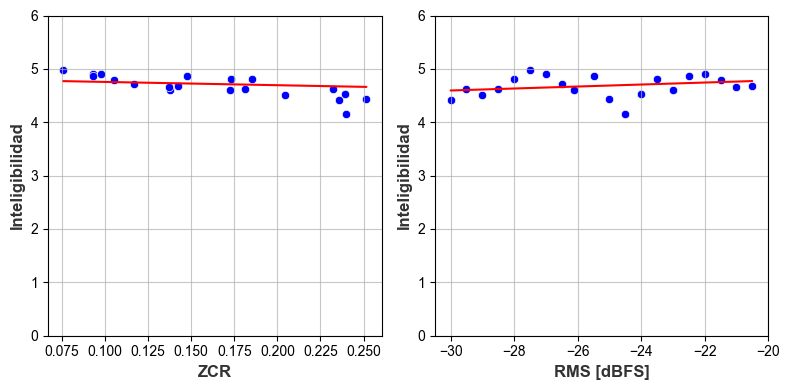

In [175]:
dims = (8,4)
fig,ax = plt.subplots(figsize=dims, ncols=2)
with sns.axes_style('darkgrid'):
    g = sns.scatterplot(x=X_selected[:, 0], y=y, ax=ax[0], color='blue')
    g = sns.lineplot(x=X_selected[:, 0], y=y_pred_zcr, ax=ax[0], color='red')
    g.set_xlabel('ZCR', weight='bold', size='large', alpha=0.8, family='Arial', stretch='extra-expanded')
    g.set_ylabel('Inteligibilidad', weight='bold', size='large', alpha=0.8, family='Arial', stretch='extra-expanded')
    # g.set_title('Regresión para la primera característica seleccionada', weight='bold', size='xx-large', alpha=0.8, family='Arial', stretch='extra-expanded')
    g.grid(alpha=0.7)
    ax[0].set_ylim(0, 6)
    
    h = sns.scatterplot(x=X_selected[:, 1], y=y, ax=ax[1], color='blue')
    h = sns.lineplot(x=X_selected[:, 1], y=y_pred_rms, ax=ax[1], color='red')
    h.set_xlabel('RMS [dBFS]', weight='bold', size='large', alpha=0.8, family='Arial', stretch='extra-expanded')
    h.set_ylabel('Inteligibilidad', weight='bold', size='large', alpha=0.8, family='Arial', stretch='extra-expanded')
    # g.set_title('Regresión para la primera característica seleccionada', weight='bold', size='xx-large', alpha=0.8, family='Arial', stretch='extra-expanded')
    h.grid(alpha=0.7)
    ax[1].set_ylim(0, 6)
    ax[1].set_xlim(-30.5, -20)
    
    plt.tight_layout()
    plt.show()


In [176]:
import plotly.express as px
import plotly.graph_objects as go

# Seleccionamos solo las características seleccionadas en X
X_selected = X[:, selected_features]

# Entrenamos el modelo de regresión con las características seleccionadas
regr_multivar.fit(X_selected, y)

# Obtenemos las predicciones del modelo para las características seleccionadas
y_pred = regr_multivar.predict(X_selected)

# Crear la figura
fig = px.scatter_3d(x=X_selected[:, 0], y=X_selected[:, 1], z=y)

# Seleccionamos solo las características seleccionadas en X
X_selected = X[:, selected_features]

# Entrenamos el modelo de regresión con las características seleccionadas
regr_multivar.fit(X_selected, y)

# Obtenemos las predicciones del modelo para las características seleccionadas
y_pred = regr_multivar.predict(X_selected)

# Crear el plano de regresión
xx, yy = np.meshgrid(X_selected[:, 0], X_selected[:, 1])
zz = regr_multivar.intercept_ + np.dot(np.array([xx.ravel(), yy.ravel()]).T, regr_multivar.coef_.ravel()).reshape(xx.shape)
fig.add_trace(go.Surface(x=xx, y=yy, z=zz, opacity=0.5))

# Etiquetas de los ejes y rango del eje z
fig.update_layout(scene=dict(xaxis_title='ZCR', yaxis_title='RMS', zaxis_title='Inteligibilidad', zaxis=dict(range=[0, 6])))

fig.show()

### Pronunciacion

In [177]:
df_pronunciacion = df_union.loc[:, ['Pronunciacion', 'zcr', 'rms', 'f0']]

In [178]:
# Cargamos los datos
X = np.array(df_pronunciacion.drop(columns=['Pronunciacion'])) # df_objetivos es el DataFrame con los parámetros objetivos
y = np.array(df_pronunciacion.Pronunciacion) # df_subjetivos es el DataFrame con los parámetros subjetivos

# Creamos el modelo de regresión kNN
regr_multivar = SVR(kernel='linear')

# Creamos el selector de características hacia adelante
forward_selector = SequentialFeatureSelector(regr_multivar, k_features='best', forward=True, scoring='neg_mean_squared_error')

# Entrenamos el selector de características
forward_selector.fit(X, y)

# Obtenemos las características seleccionadas
selected_features = forward_selector.k_feature_idx_

# Imprimimos las características seleccionadas
print('Características seleccionadas:', selected_features)


Características seleccionadas: (0,)


In [179]:
# Establecemos la semilla aleatoria para reproducibilidad
random_state = check_random_state(0)

for i in range(X.shape[1]):
    
    # Seleccionamos solo una columna en X
    X_single = X[:, i].reshape(-1, 1)
    
    # Aplicamos la prueba de permutación
    score, permutation_scores, pvalue = permutation_test_score(regr_multivar, X_single, y, scoring='neg_mean_squared_error', cv=5, n_permutations=1000, random_state=random_state)

    # Imprimimos el p-valor
    if i == 0:
        var = 'ZCR'
    elif i == 1:
        var = 'RMS'
    else:
        var = 'f0'
    print(f'{var} p-valor:', pvalue)


ZCR p-valor: 0.007992007992007992
RMS p-valor: 0.4885114885114885
f0 p-valor: 0.6103896103896104


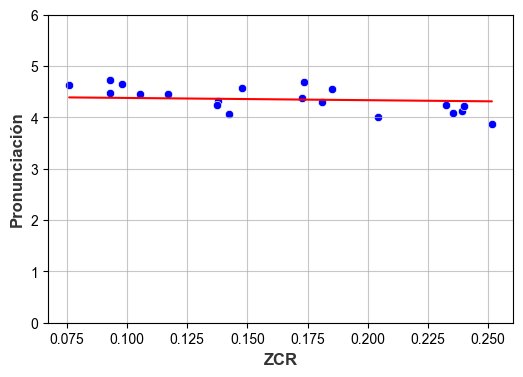

In [180]:
# Seleccionamos solo las características seleccionadas en X
X_selected = X[:, selected_features]

# Entrenamos el modelo de regresión con las características seleccionadas
regr_multivar.fit(X_selected, y)

# Obtenemos las predicciones del modelo para las características seleccionadas
y_pred = regr_multivar.predict(X_selected)

dims = (6,4)
fig,ax = plt.subplots(figsize=dims)
with sns.axes_style('darkgrid'):
    g = sns.scatterplot(x=X_selected[:, 0], y=y, ax=ax, color='blue')
    g = sns.lineplot(x=X_selected[:, 0], y=y_pred, ax=ax, color='red')
    g.set_xlabel('ZCR', weight='bold', size='large', alpha=0.8, family='Arial', stretch='extra-expanded')
    g.set_ylabel('Pronunciación', weight='bold', size='large', alpha=0.8, family='Arial', stretch='extra-expanded')
    # g.set_title('Regresión para la primera característica seleccionada', weight='bold', size='xx-large', alpha=0.8, family='Arial', stretch='extra-expanded')
    g.grid(alpha=0.7)
    plt.ylim(0, 6)
    plt.show()